In [84]:
import numpy as np
import glob
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [38]:
data_path = '../../data/cnn/new_data/'

In [39]:
new_files = glob.glob(data_path+'*.csv')

In [63]:
for file in new_files:
    cnn = np.genfromtxt(file,delimiter=",")
    Y = 1 if file.split(".")[-3] == 'b' else 0
    with open('../../data/cnn\\new_data/cont_features_cnn.csv', 'ab') as f_handle:
        np.savetxt(f_handle, np.concatenate((cnn, np.ones((cnn.shape[0],1)) * Y), axis=1 ) , fmt='%.6e', delimiter=',')

In [68]:
train = np.genfromtxt(data_path+'../train.csv',delimiter=",")
cont = np.genfromtxt(data_path+'../cont_features_cnn.csv',delimiter=",")
test = np.genfromtxt(data_path+'../test.csv',delimiter=",")

In [141]:
trainX = train[:,:-1]#np.concatenate((train[:,:-1], cont[:,:-1]),axis=0) #cont[:,:-1]#
trainY = train[:,-1]#np.concatenate((train[:,-1], cont[:,-1]),axis=0) #cont[:,-1]#
testX = test[:,:-1]
testY = test[:,-1]
clf = LogisticRegression(penalty='l1')
clf.fit(trainX,trainY)
print(clf.score(trainX,trainY), clf.score(testX, testY))
print(trainX.shape,testX.shape)

1.0 0.617021276596
(617, 1024) (235, 1024)


In [142]:
trainX = cont[:,:-1]#
trainY = cont[:,-1]#
testX = test[:,:-1]
testY = test[:,-1]

import timeit

start = timeit.timeit()
def useLR(TrX,TrY,TeX,TeY,penalty='l2'):
    clf = LogisticRegression(penalty=penalty)
    clf.fit(TrX,TrY)
    print(clf.score(TrX,TrY), clf.score(TeX, TeY))
    print(TrX.shape,TeX.shape)
    return clf

# PCA Visualization

In [148]:
pca = PCA(n_components=200)
def fit_transform(X):
    return pca.fit_transform(X)
def trans(X):
    return pca.transform(X)
def plot(X,Y):
    X_b = X[Y==1]
    X_h = X[Y==0]
    plt.scatter(X_b[:,0], X_b[:,1])
    plt.scatter(X_h[:,0], X_h[:,1])
    plt.show()

In [149]:
pcaTrainX = fit_transform(trainX)
pcaTestX = trans(testX)
newTrainX, newTestX = normalize(pcaTrainX, pcaTestX)
print(newTrainX.shape, newTestX.shape)

(1153, 200) (235, 200)


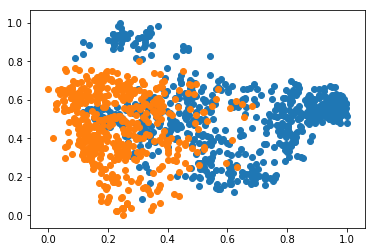

In [150]:
plot(newTrainX, trainY)

In [152]:
cl = useLR(newTrainX,trainY, newTestX, testY, penalty='l1')

0.98699045967 0.582978723404
(1153, 200) (235, 200)


In [153]:
cl.coef_

array([[ 12.90021507,   3.41410353,  -6.95497285,   1.48570893,
         -0.98748611,  -5.82359095,   3.97451357,   0.        ,
          5.91299206,  -4.41187389,   3.92743787,  -3.81732091,
         -1.60867868,  -5.6220341 ,   0.        ,   0.        ,
          0.94691181,  -0.42038587,   0.27083886,   1.63945213,
         -2.30068089,  -2.10632101,   0.        ,  -0.01788613,
          0.62122105,  -0.59732066,   0.        ,   0.        ,
          0.        ,   0.        ,  -0.61040553,   0.74592907,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.66795903,   0.        ,
          0.        ,  -1.72470482,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  -0.32624436,   0.        ,
         -2.44319593,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.

In [154]:
cl.intercept_

array([ 0.])

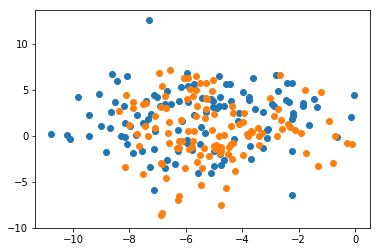

In [155]:
plot(pcaTestX,testY)

In [129]:
def normalize(trX,teX):
    newTrX = (trX - trX.min(0) ) / trX.ptp(0)
    newTeX = (teX - trX.min(0) ) / trX.ptp(0)
    return newTrX, newTeX